In [35]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt

In [36]:

columns = ['job_title','Company', 'working_place','website', 'posted_time', 'working_type', 'job_description']
data = pd.read_csv('job_list.csv', names=columns, index_col=False)

#parsing job_descriptions.

data['big_data'] = data['job_description'].apply(lambda x: 1 if 'big data' in x.lower() else 0)
data['analysis'] = data['job_description'].apply(lambda x: 1 if 'analysis' in x.lower() else 0)
data['data_visualization'] = data['job_description'].apply(lambda x: 1 if 'visualization' in x.lower() else 0)
data['Hadoop'] = data['job_description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
data['Database'] = data['job_description'].apply(lambda x: 1 if 'database' in x.lower() else 0)
data['Apache'] = data['job_description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
#data['r_studio'] = data['job_description'].apply(lambda x: 1 if 'r-studio' in x.lower() else 0)
#parsing the posted_time

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [37]:
df = pd.read_csv('jobs_data_cleaned.csv')

In [39]:
df.head()

,job_title,Company,working_place,website,posted_time,working_type,job_description,big_data,analysis,data_visualization,Hadoop,Database,Apache
0,Data Scientist,RED CIRCLE,Rwanda,Rwandajob.com,26 days ago,Full–time,We are looking for profiles and CVs of Data Sc...,1,1,0,0,0,0
1,Senior Product Analyst,GitLab,Kigali,LinkedIn,26 days ago,Full–time,"GitLab's DevOps platform empowers 100,000+ org...",0,1,0,0,0,0
2,Business Intelligence Analyst,RED CIRCLE,Rwanda,Rwandajob.com,Over 1 month ago,Full–time,We are looking for profiles and CVs of Busines...,0,0,0,0,0,0
3,Data Analyst (Maternity Cover),Babylon,Kigali,ParallelDesk,Over 1 month ago,Full–time,Babyl is Rwanda’s first full-service mobile he...,0,0,0,0,0,0
4,"Senior Analyst, Online Sales & Self Service Data",GitLab,Kigali,LinkedIn,13 days ago,Full–time,"GitLab's DevOps platform empowers 100,000+ org...",0,0,0,0,0,0


In [40]:
df.columns

Index(['job_title', 'Company', 'working_place', 'website', 'posted_time',
       'working_type', 'job_description', 'big_data', 'analysis',
       'data_visualization', 'Hadoop', 'Database', 'Apache'],
      dtype='object')

In [41]:
corr = df[['big_data', 'analysis',
       'data_visualization', 'Hadoop', 'Database', 'Apache']].corr()

<AxesSubplot:>

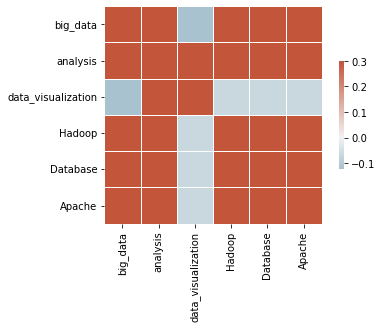

In [42]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'product analyst' in title.lower():
        return 'product analyst'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'business analyst' in title.lower():
        return 'business anlyst'
    elif 'data specialist' in title.lower():
        return 'data specialist'
    elif 'big data engineer' in title.lower():
        return 'data engineer'
    elif 'big data engineer' in title.lower():
        return 'data engineer'

    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		

In [44]:
df.columns

Index(['job_title', 'Company', 'working_place', 'website', 'posted_time',
       'working_type', 'job_description', 'big_data', 'analysis',
       'data_visualization', 'Hadoop', 'Database', 'Apache'],
      dtype='object')

In [45]:
#Job title
df['simple_job_title'] = df['job_title'].apply(title_simplifier)
df.simple_job_title.value_counts()

na                 6
data specialist    4
data engineer      2
data scientist     1
product analyst    1
data analyst       1
business anlyst    1
Name: simple_job_title, dtype: int64

In [52]:
df['job_level'] = df['job_title'].apply(seniority)
df.job_level.value_counts()

na        13
senior     3
Name: job_level, dtype: int64

In [53]:
df_cat = df[['simple_job_title', 'job_level', 'Company', 'working_place', 'website', 'posted_time','big_data', 'analysis',
       'data_visualization', 'Hadoop', 'Database', 'Apache']]

In [48]:
df.head()

,job_title,Company,working_place,website,posted_time,working_type,job_description,big_data,analysis,data_visualization,Hadoop,Database,Apache,simple_job_title,job_level
0,Data Scientist,RED CIRCLE,Rwanda,Rwandajob.com,26 days ago,Full–time,We are looking for profiles and CVs of Data Sc...,1,1,0,0,0,0,data scientist,na
1,Senior Product Analyst,GitLab,Kigali,LinkedIn,26 days ago,Full–time,"GitLab's DevOps platform empowers 100,000+ org...",0,1,0,0,0,0,product analyst,senior
2,Business Intelligence Analyst,RED CIRCLE,Rwanda,Rwandajob.com,Over 1 month ago,Full–time,We are looking for profiles and CVs of Busines...,0,0,0,0,0,0,na,na
3,Data Analyst (Maternity Cover),Babylon,Kigali,ParallelDesk,Over 1 month ago,Full–time,Babyl is Rwanda’s first full-service mobile he...,0,0,0,0,0,0,data analyst,na
4,"Senior Analyst, Online Sales & Self Service Data",GitLab,Kigali,LinkedIn,13 days ago,Full–time,"GitLab's DevOps platform empowers 100,000+ org...",0,0,0,0,0,0,na,senior


the graph for simple_job_title: total = 7


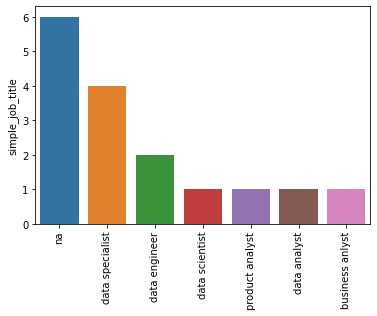

the graph for job_level: total = 2


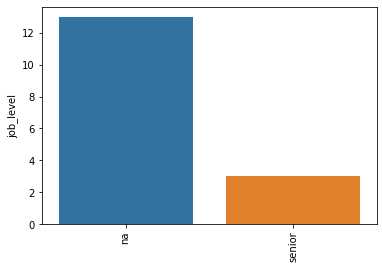

the graph for Company: total = 11


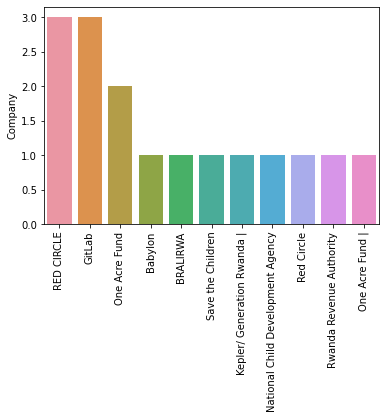

the graph for working_place: total = 3


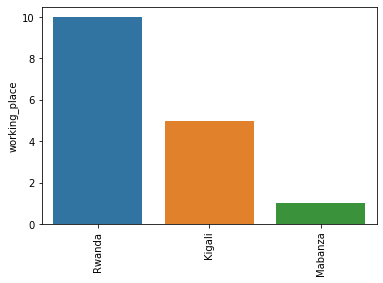

the graph for website: total = 7


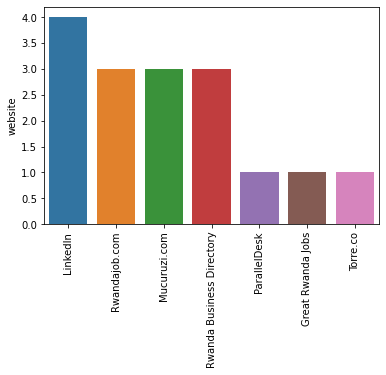

the graph for posted_time: total = 7


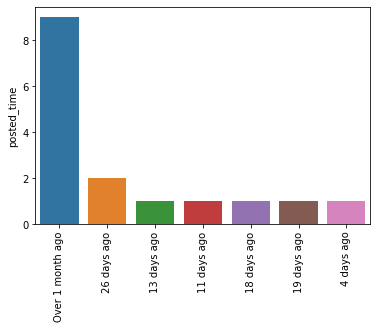

the graph for big_data: total = 2


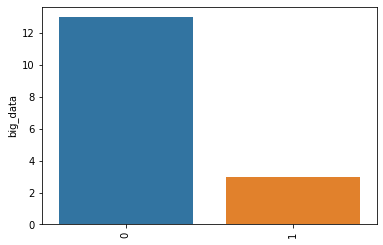

the graph for analysis: total = 2


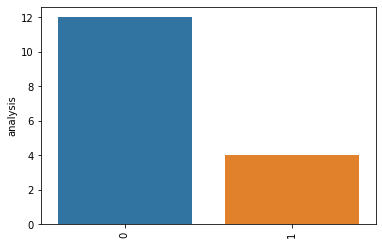

the graph for data_visualization: total = 2


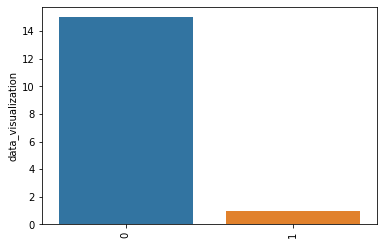

the graph for Hadoop: total = 2


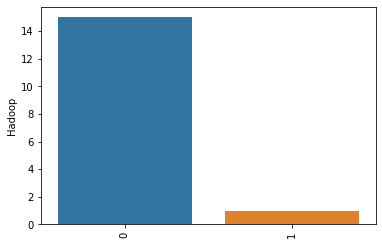

the graph for Database: total = 2


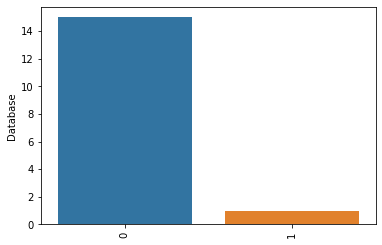

the graph for Apache: total = 2


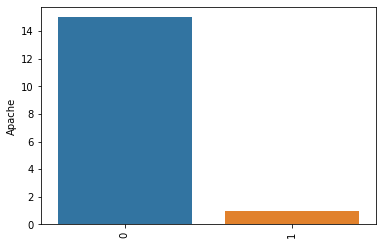

In [54]:
for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print('the graph for %s: total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [55]:
df.to_csv('jobs_final.csv', index=False)

In [57]:
data = pd.read_csv('jobs_final.csv')
data.head()

,job_title,Company,working_place,website,posted_time,working_type,job_description,big_data,analysis,data_visualization,Hadoop,Database,Apache,simple_job_title,job_level
0,Data Scientist,RED CIRCLE,Rwanda,Rwandajob.com,26 days ago,Full–time,We are looking for profiles and CVs of Data Sc...,1,1,0,0,0,0,data scientist,na
1,Senior Product Analyst,GitLab,Kigali,LinkedIn,26 days ago,Full–time,"GitLab's DevOps platform empowers 100,000+ org...",0,1,0,0,0,0,product analyst,senior
2,Business Intelligence Analyst,RED CIRCLE,Rwanda,Rwandajob.com,Over 1 month ago,Full–time,We are looking for profiles and CVs of Busines...,0,0,0,0,0,0,na,na
3,Data Analyst (Maternity Cover),Babylon,Kigali,ParallelDesk,Over 1 month ago,Full–time,Babyl is Rwanda’s first full-service mobile he...,0,0,0,0,0,0,data analyst,na
4,"Senior Analyst, Online Sales & Self Service Data",GitLab,Kigali,LinkedIn,13 days ago,Full–time,"GitLab's DevOps platform empowers 100,000+ org...",0,0,0,0,0,0,na,senior


In [58]:
data.columns

Index(['job_title', 'Company', 'working_place', 'website', 'posted_time',
       'working_type', 'job_description', 'big_data', 'analysis',
       'data_visualization', 'Hadoop', 'Database', 'Apache',
       'simple_job_title', 'job_level'],
      dtype='object')

<AxesSubplot:xlabel='analysis'>

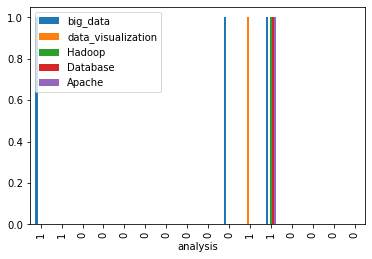

In [144]:
data[['big_data', 'analysis',
       'data_visualization', 'Hadoop', 'Database', 'Apache']].plot(x='analysis', kind='bar')
#df[["X", "A", "B", "C"]].plot(x="X", kind="bar")

<AxesSubplot:xlabel='data_visualization'>

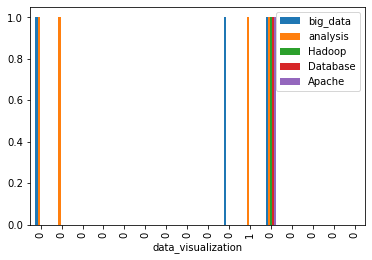

In [150]:
data.plot(x='data_visualization', y=['big_data', 'analysis','Hadoop', 'Database', 'Apache'], kind="bar")

the graph for big_data: total = 2


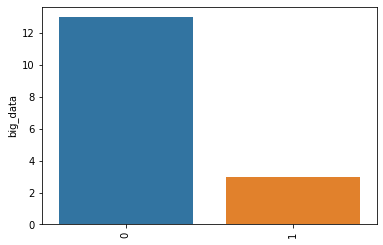

the graph for analysis: total = 2


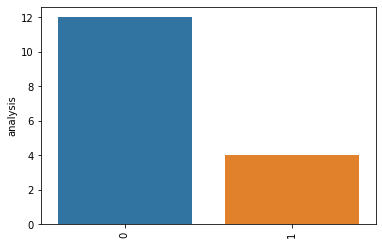

the graph for data_visualization: total = 2


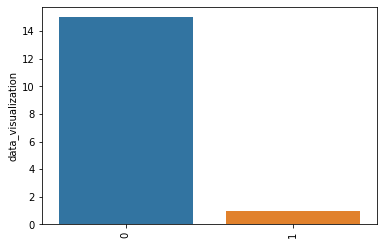

the graph for Hadoop: total = 2


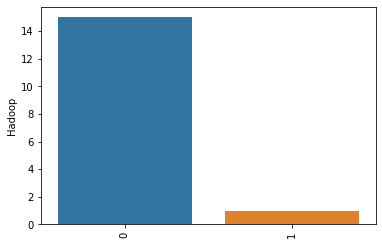

the graph for Database: total = 2


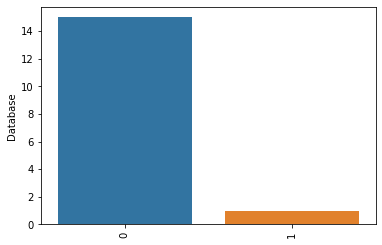

the graph for Apache: total = 2


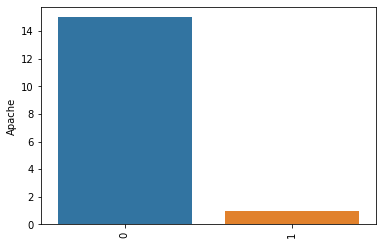

In [96]:
for i in skills:
    cat_num = skills[i].value_counts()
    print('the graph for %s: total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()